In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier

In [2]:
columns_for_normalization = ['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

columns_for_bins = ['Elevation', 'Horizontal_Distance_To_Roadways']

**_Get data_**

In [3]:
dataset = pd.read_csv('train.csv')
dataset.drop("Id", axis=1, inplace=True)

**_Work with SoilType_**

In [4]:
dataset.drop(dataset.index[dataset['Soil_Type8'] == 1], inplace=True)
dataset.drop(dataset.index[dataset['Soil_Type9'] == 1], inplace=True)

**_Get training data_**

In [5]:
X = dataset.drop("Cover_Type", axis=1)
y = dataset["Cover_Type"]

In [6]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

**_Get test data_**

In [7]:
test_data = pd.read_csv('test.csv')
id_column = test_data["Id"].copy(deep=True)
test_data.drop("Id", axis=1, inplace=True)

**_Eucledean distance_**

In [8]:
# X['Euclidian_Distance_To_Hydrology'] = (X['Horizontal_Distance_To_Hydrology']**2 + X['Vertical_Distance_To_Hydrology']**2)**0.5
# test_data['Euclidian_Distance_To_Hydrology'] = (test_data['Horizontal_Distance_To_Hydrology']**2 + test_data['Vertical_Distance_To_Hydrology']**2)**0.5

**_Normalize data_**

In [9]:
X[columns_for_normalization] = normalize(X[columns_for_normalization])
test_data[columns_for_normalization] = normalize(test_data[columns_for_normalization])

In [10]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,0.008102,0.000477,0.040989,0.000000,510,0.035111,0.036858,0.023513,0.997552,...,0,0,0,0,0,0,0,0,0,0
1,2590,0.008976,0.000321,0.033980,-0.000962,390,0.035262,0.037666,0.024203,0.997755,...,0,0,0,0,0,0,0,0,0,0
2,2804,0.022641,0.001466,0.043653,0.010587,3180,0.038115,0.038766,0.021989,0.997010,...,0,0,0,0,0,0,0,0,0,0
3,2785,0.024883,0.002890,0.038850,0.018943,3090,0.038208,0.038208,0.019586,0.997096,...,0,0,0,0,0,0,0,0,0,0
4,2595,0.007277,0.000323,0.024740,-0.000162,391,0.035574,0.037838,0.024255,0.998023,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,0.175948,0.016654,0.186809,0.005068,660,0.123091,0.181740,0.154950,0.928252,...,0,0,0,0,0,0,0,0,0,0
15116,2603,0.079296,0.012451,0.414829,0.127791,618,0.163179,0.144830,0.059636,0.868323,...,0,0,0,0,0,0,0,0,0,0
15117,2492,0.103008,0.019218,0.280582,0.089940,335,0.192180,0.169118,0.063804,0.912469,...,0,0,0,0,0,0,0,0,0,0
15118,2487,0.160860,0.026971,0.209985,0.097287,242,0.220581,0.228287,0.114625,0.897735,...,0,0,0,0,0,0,0,0,0,0


**_Create bins_**

d:\miniconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Elevation'>

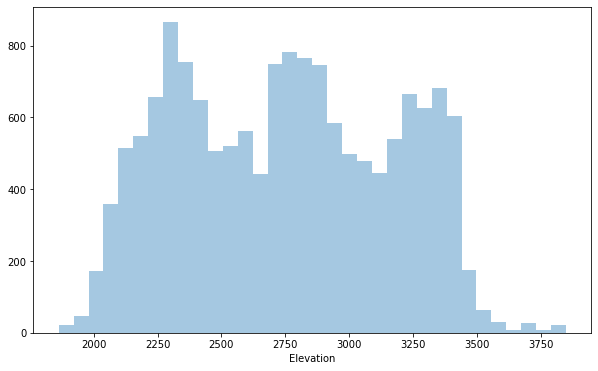

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(a=X['Elevation'], kde=False)

<AxesSubplot:xlabel='Elevation'>

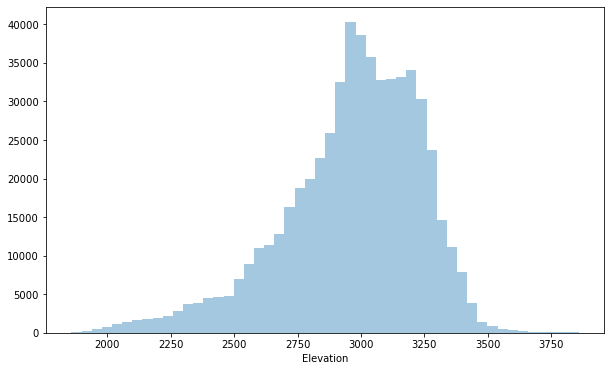

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(a=test_data['Elevation'], kde=False)

In [13]:
# for datasets in [data, test_data]:
#     if datasets['Elevation'] > 0 and datasets['Elevation'] <

**_Work with wilderness area_**

In [14]:
# for data in [X, test_data]:
#     data['Wilderness_Area_12'] = data['Wilderness_Area1'] + data['Wilderness_Area2']
#     data.drop("Wilderness_Area1", axis=1, inplace=True)
#     data.drop("Wilderness_Area2", axis=1, inplace=True)

**_Train model_**

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_jobs=-1, random_state=42).fit(X, y)
model.fit(X, y)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

**_Predict probability_**

In [16]:
predicted_probability = model.predict_proba(test_data)
df_probabilities = pd.DataFrame(predicted_probability, index=id_column)

**_Predict model_**

In [17]:
y_predicted = model.predict(test_data)
df_for_saving = pd.DataFrame(y_predicted, index=id_column, columns=["Cover_Type"])

In [18]:
df_for_saving[df_probabilities.max(axis=1) < 0.5] = 2

**_Save dataset_**

In [19]:
df_for_saving.to_csv('cover_type.csv', index_label="Id")

Combinations tried:
    - standard scaler

1 - Spruce/Fir

2 - Lodgepole Pine

3 - Ponderosa Pine

4 - Cottonwood/Willow

5 - Aspen

6 - Douglas-fir

7 - Krummholz

<AxesSubplot:xlabel='Wilderness_Area1'>

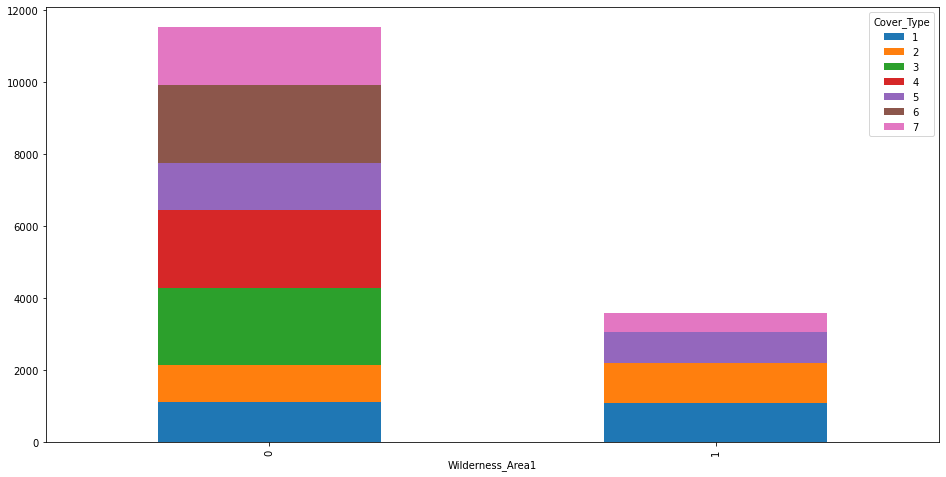

In [20]:
plt.rcParams["figure.figsize"] = (16,8)
df2 = dataset.groupby(['Wilderness_Area1', 'Cover_Type'])['Wilderness_Area1'].count().unstack('Cover_Type')
df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Wilderness_Area2'>

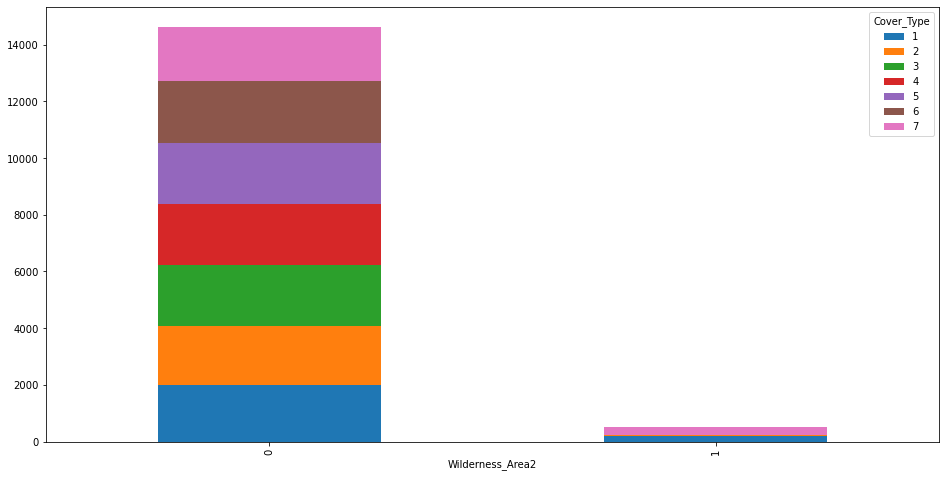

In [21]:
df2 = dataset.groupby(['Wilderness_Area2', 'Cover_Type'])['Wilderness_Area2'].count().unstack('Cover_Type')
df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Wilderness_Area3'>

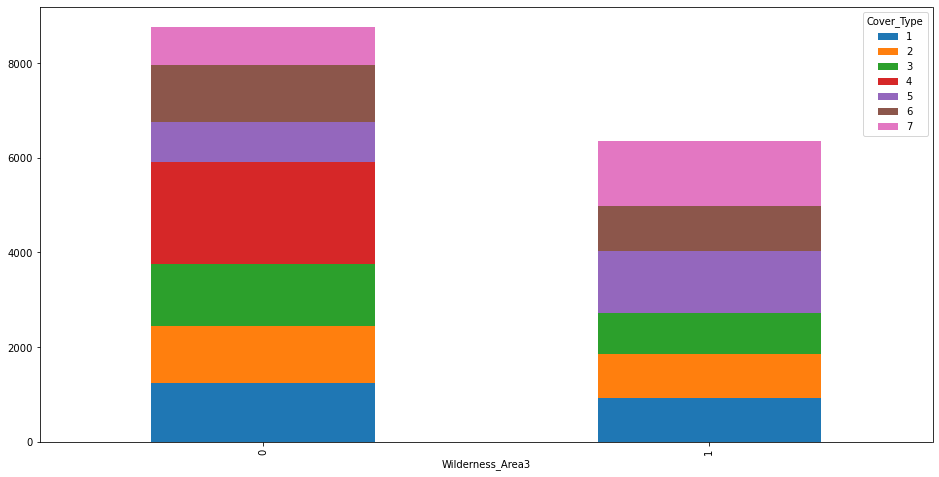

In [22]:
df2 = dataset.groupby(['Wilderness_Area3', 'Cover_Type'])['Wilderness_Area3'].count().unstack('Cover_Type')
df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Wilderness_Area4'>

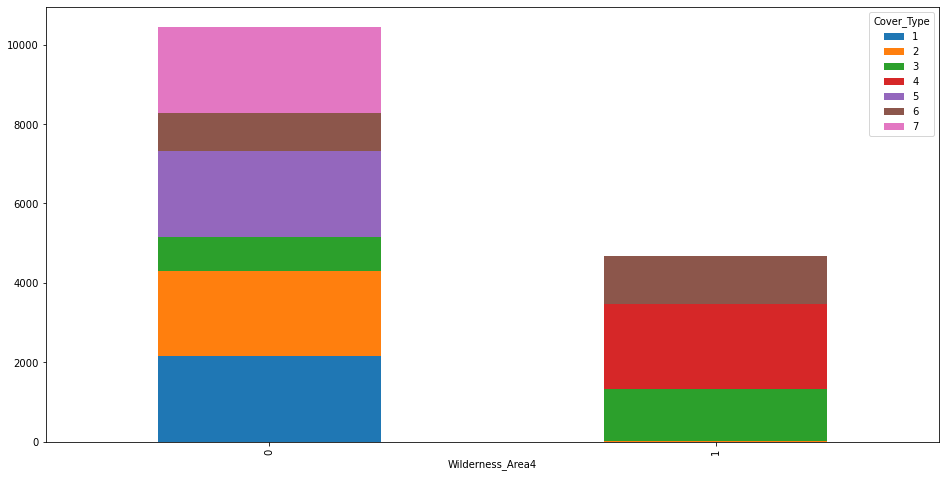

In [23]:
df2 = dataset.groupby(['Wilderness_Area4', 'Cover_Type'])['Wilderness_Area4'].count().unstack('Cover_Type')
df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

**_Examining soil_**

d:\miniconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


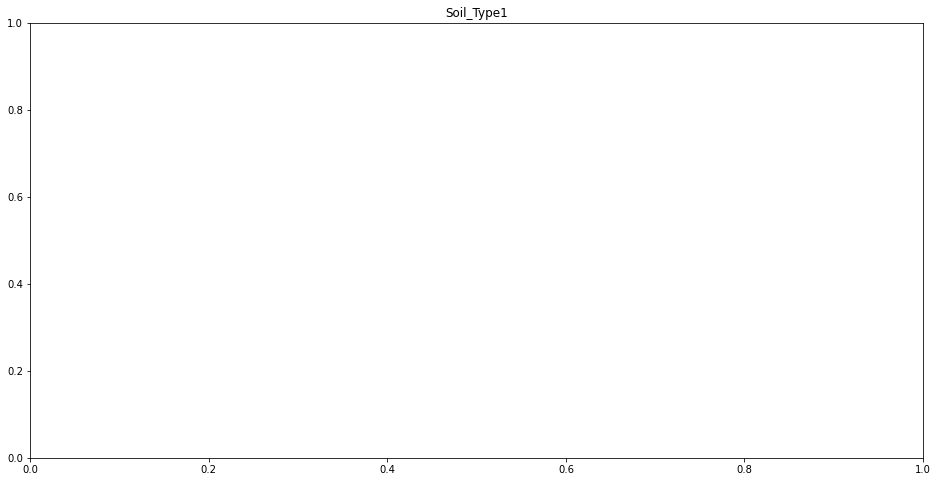

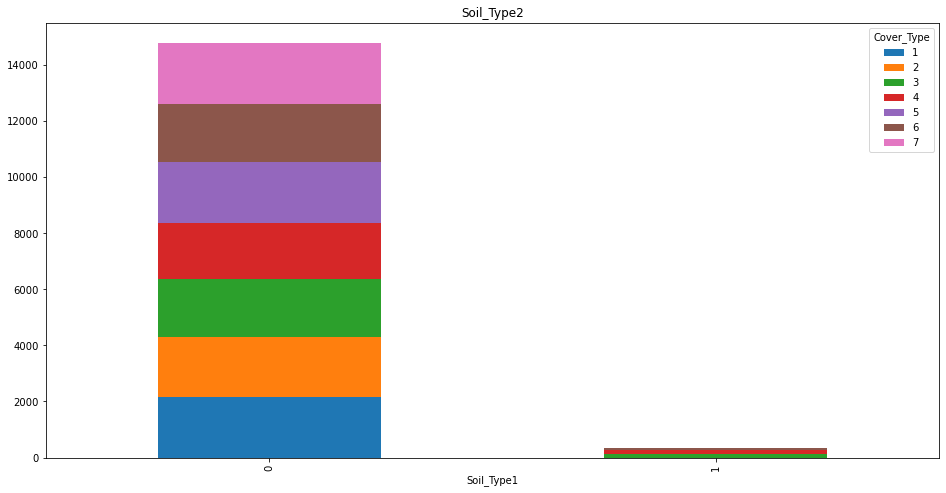

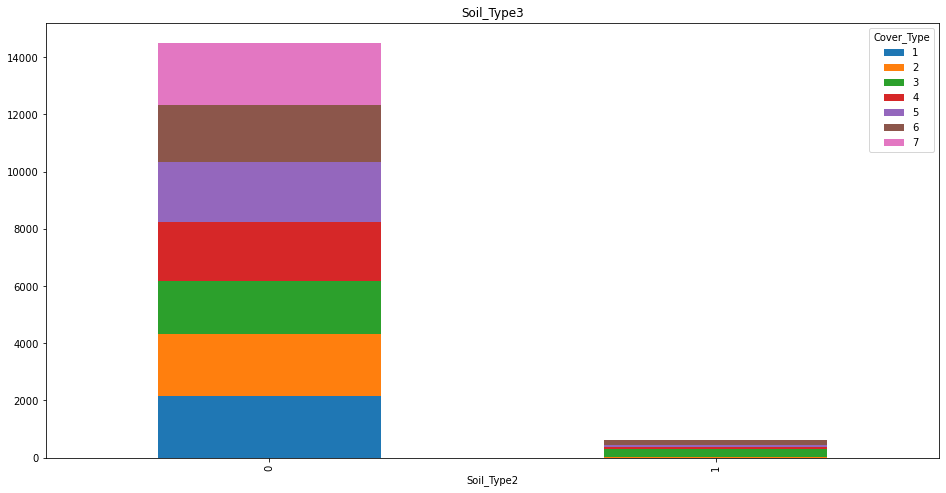

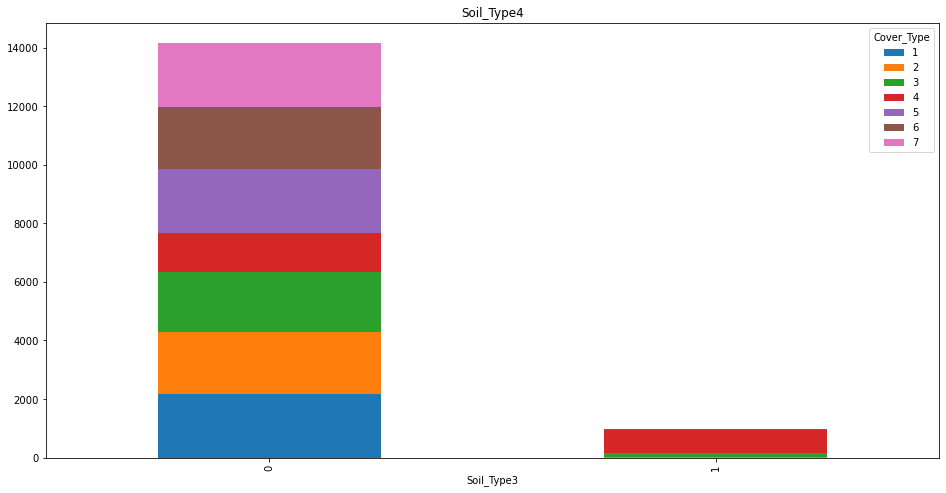

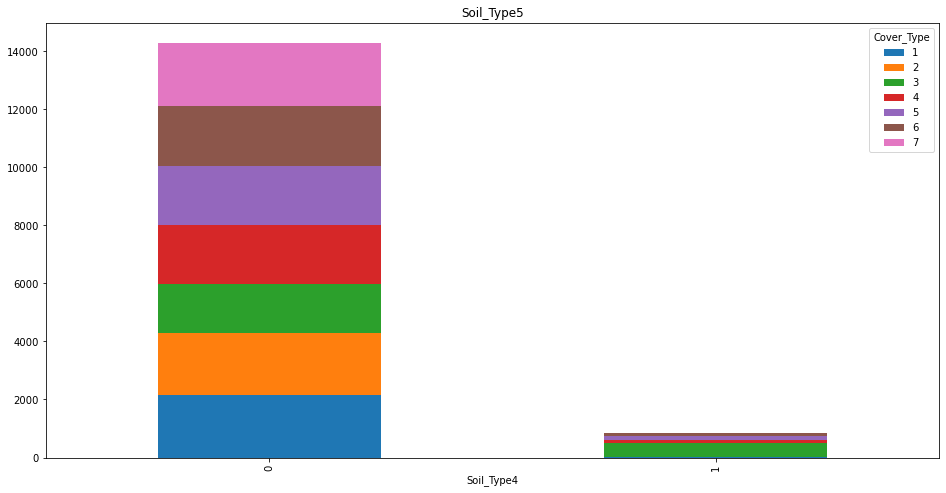

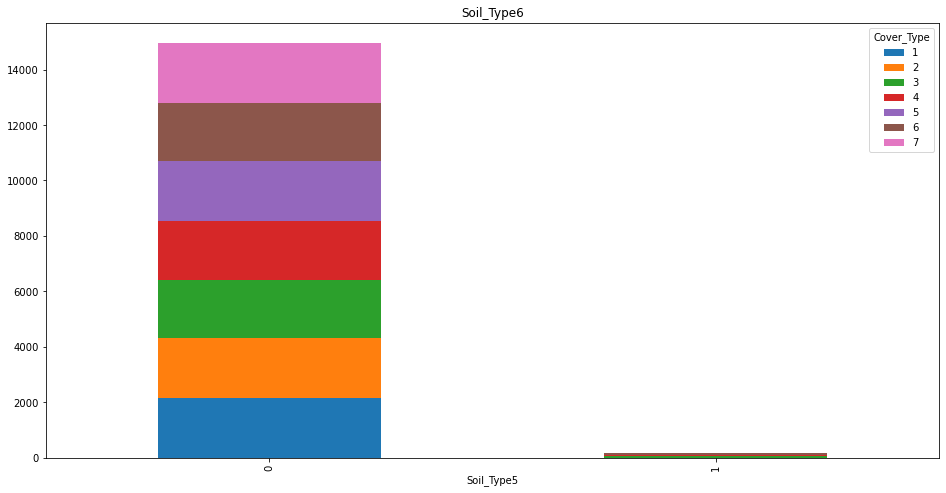

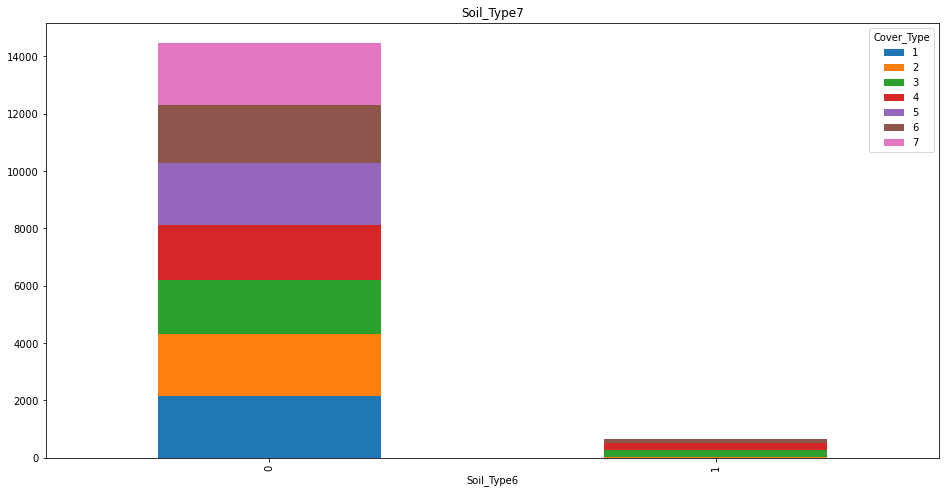

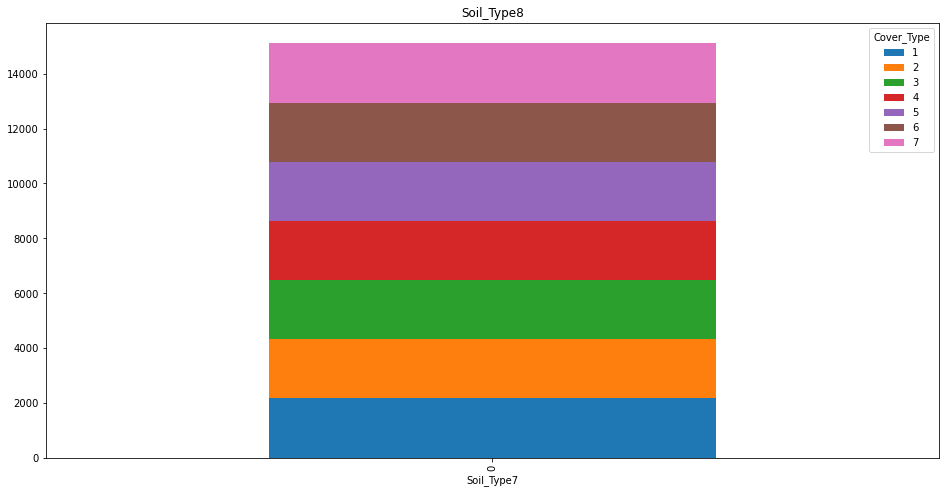

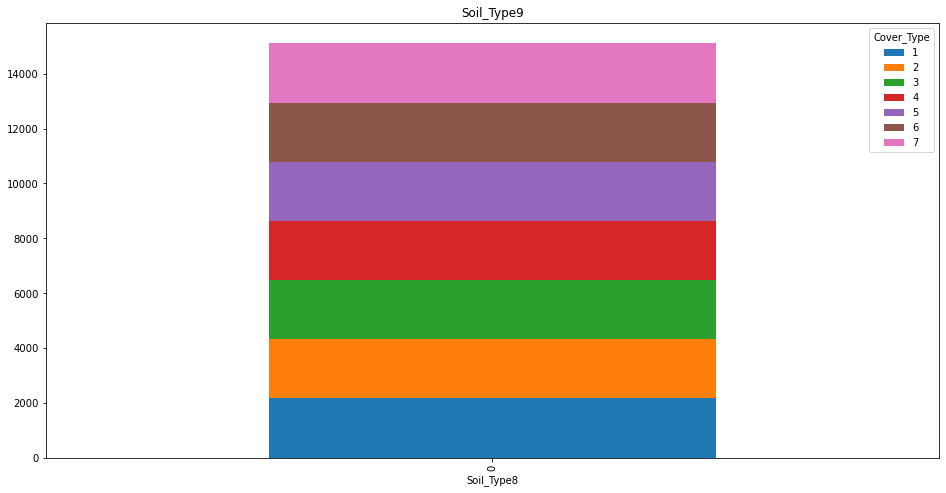

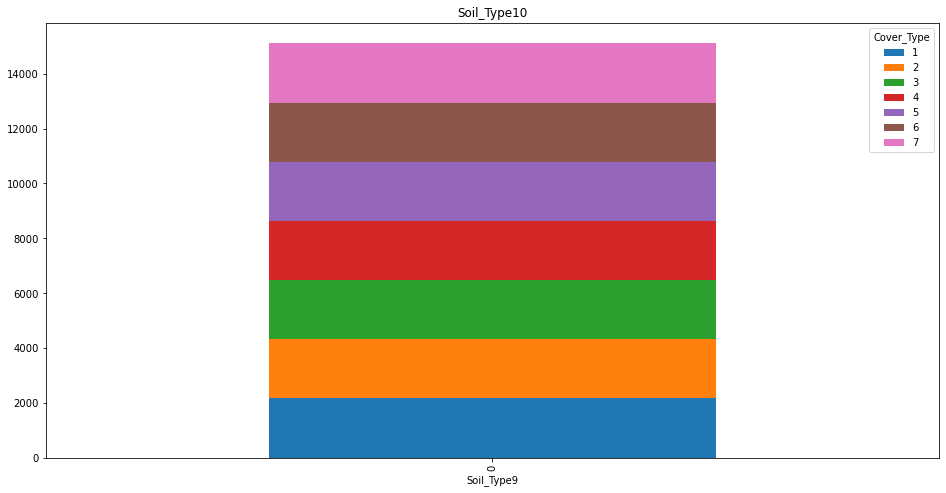

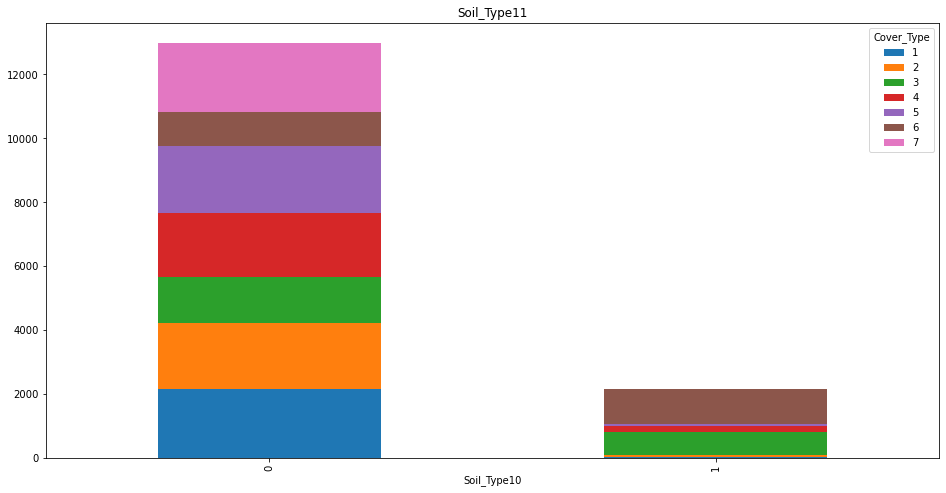

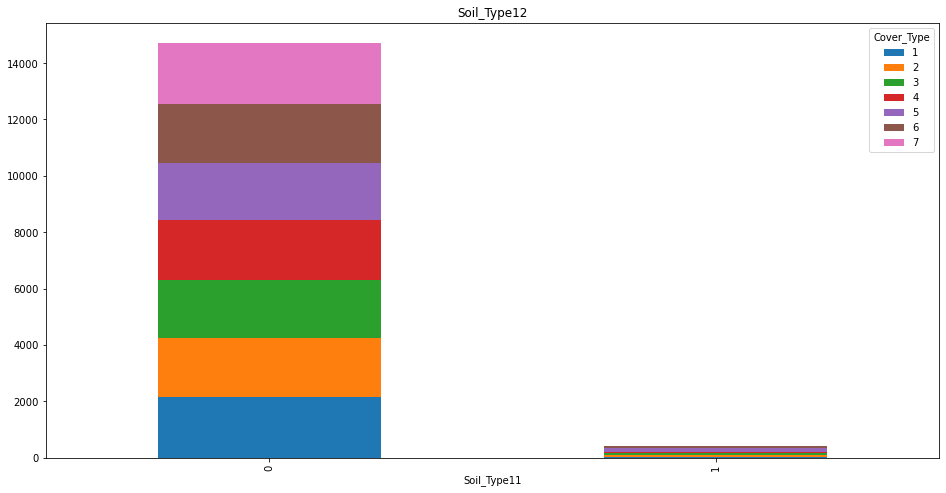

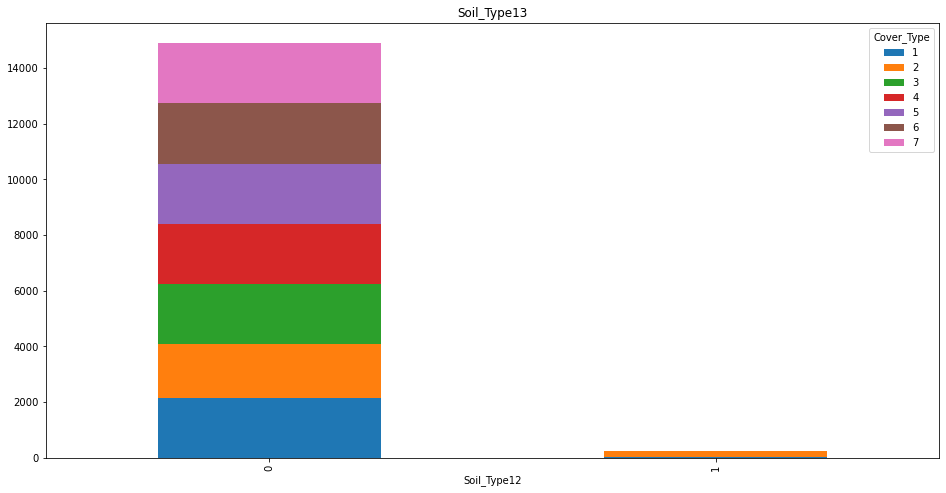

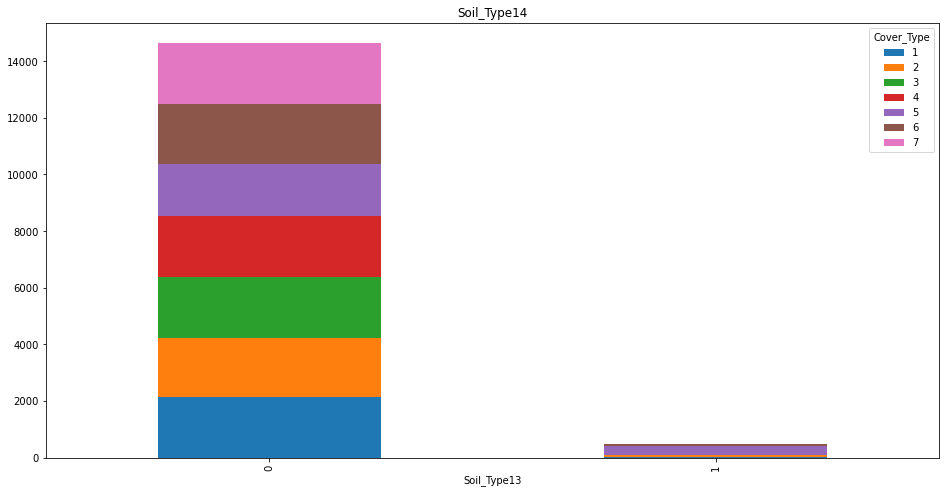

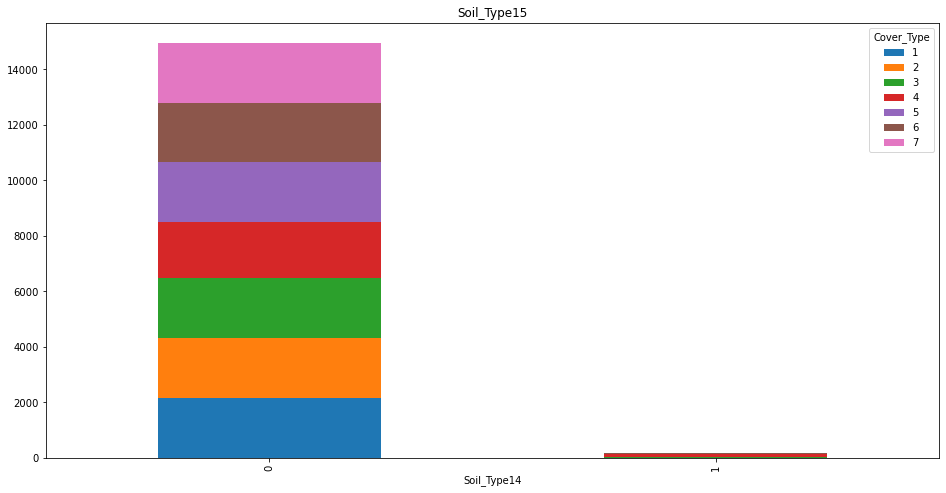

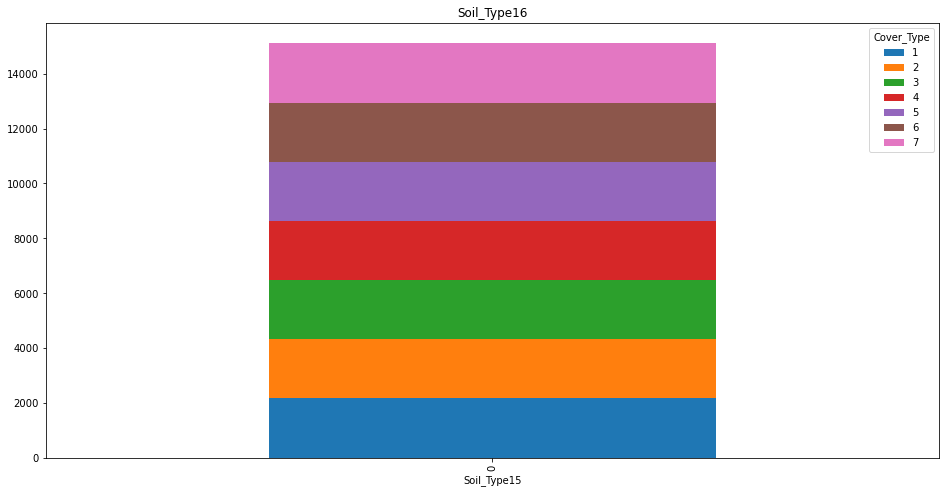

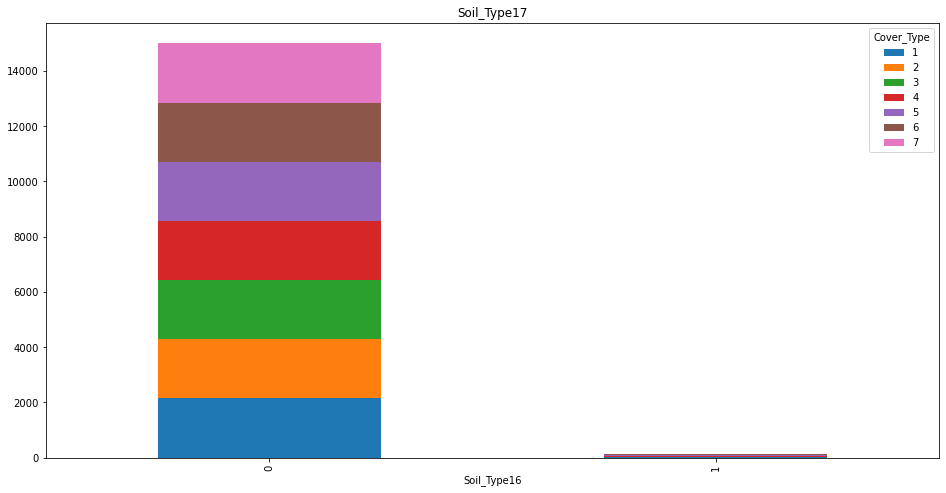

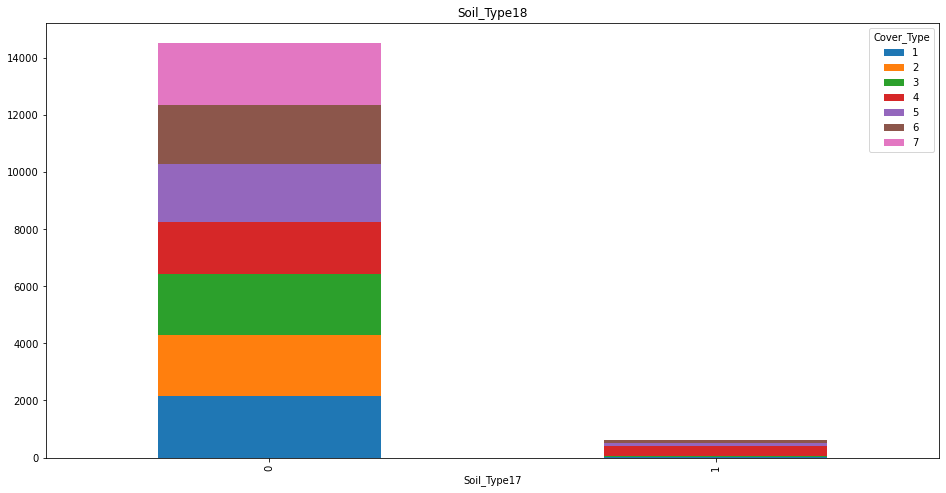

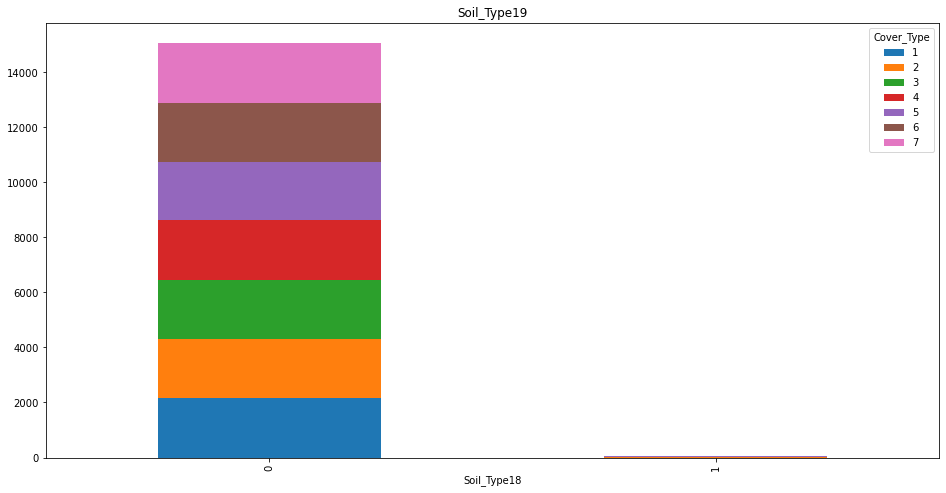

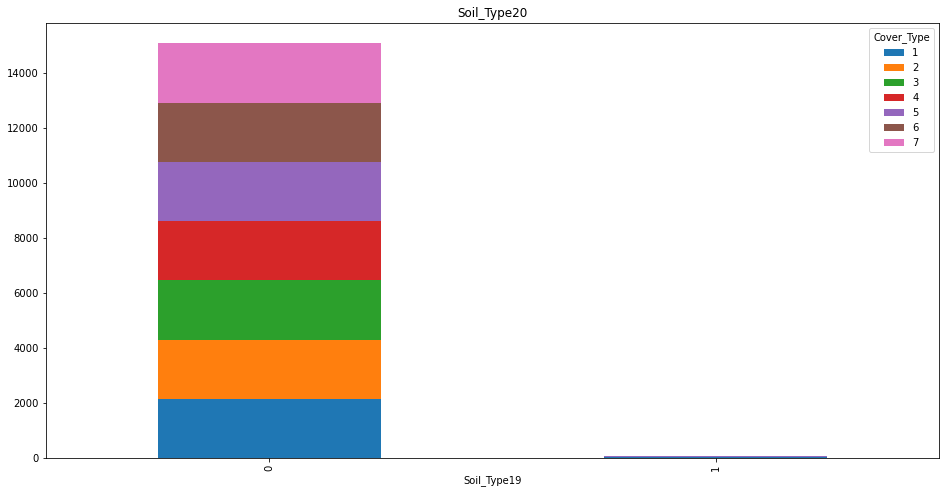

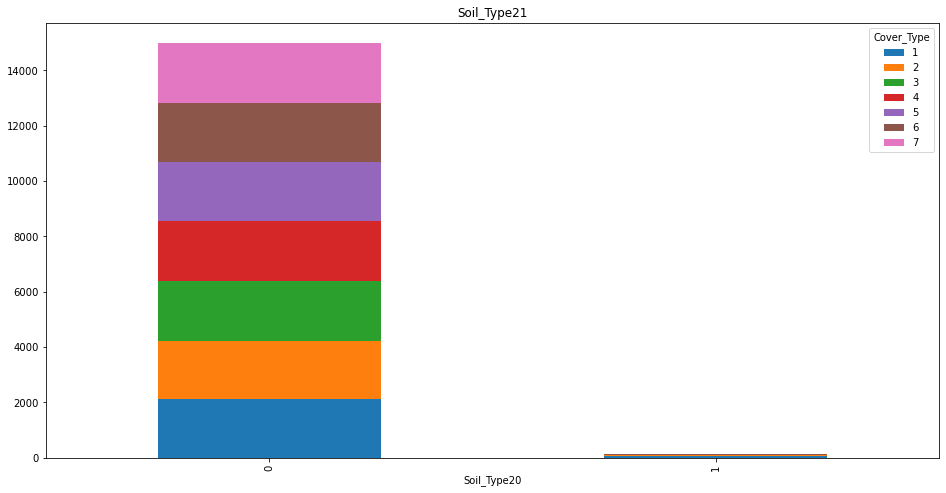

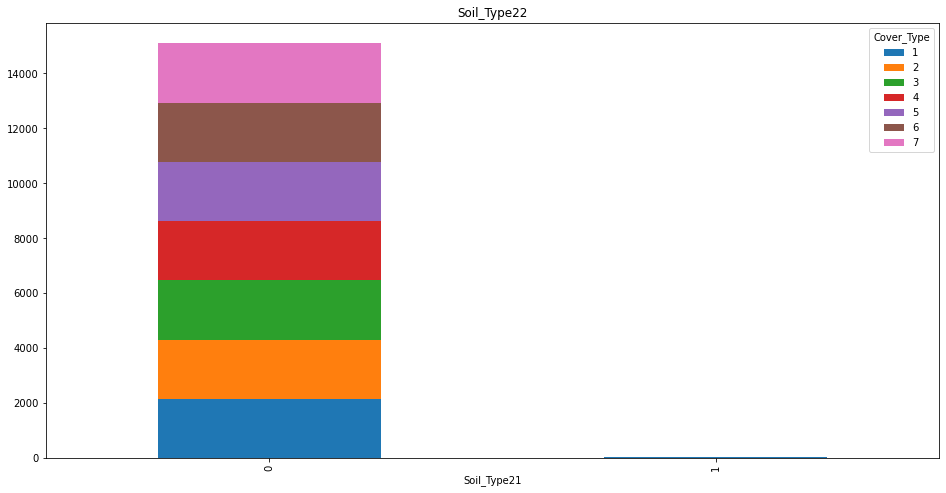

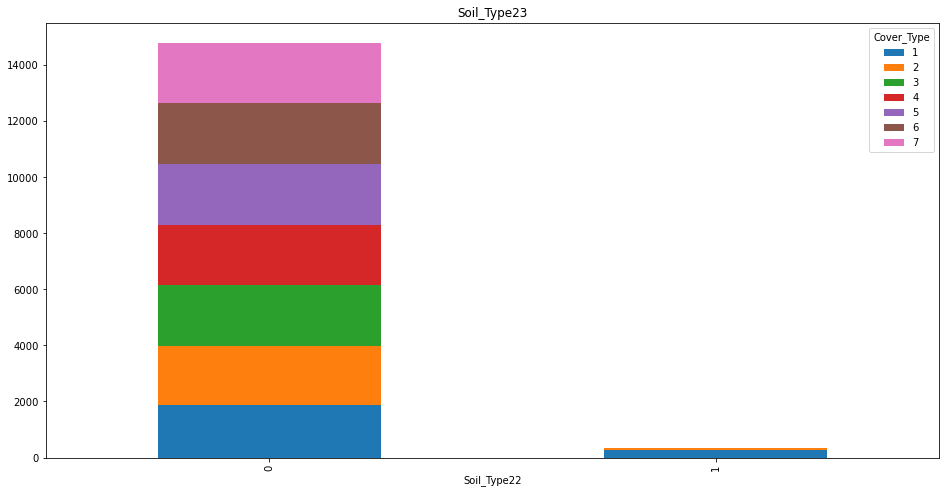

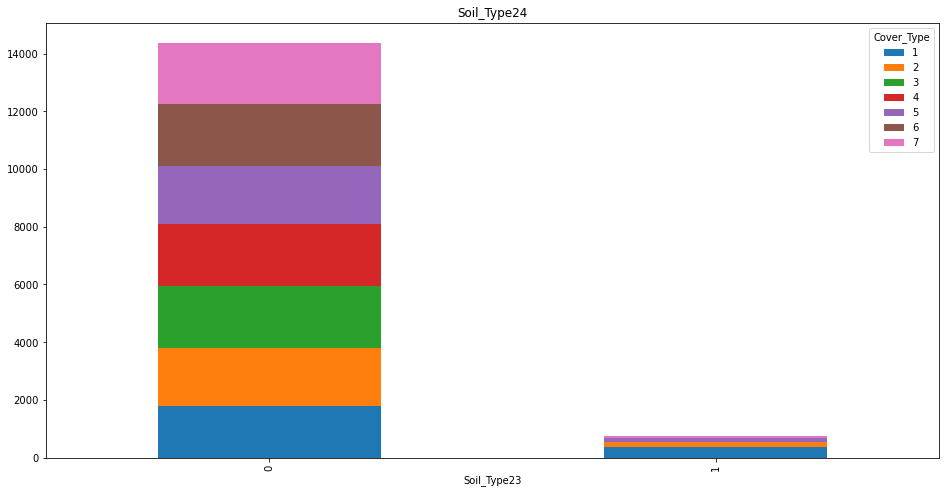

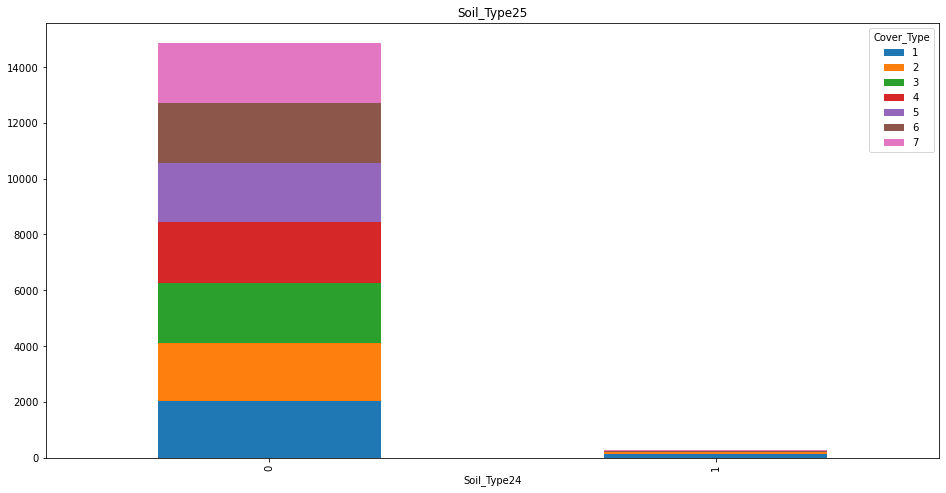

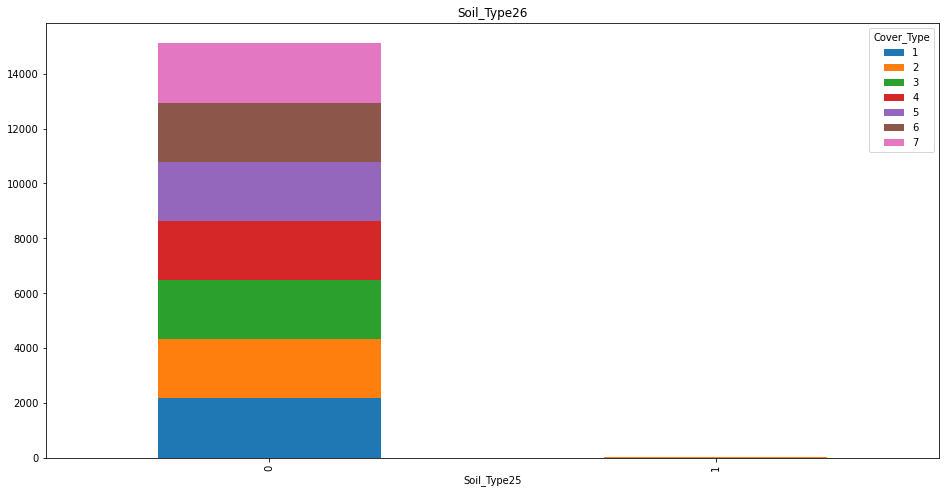

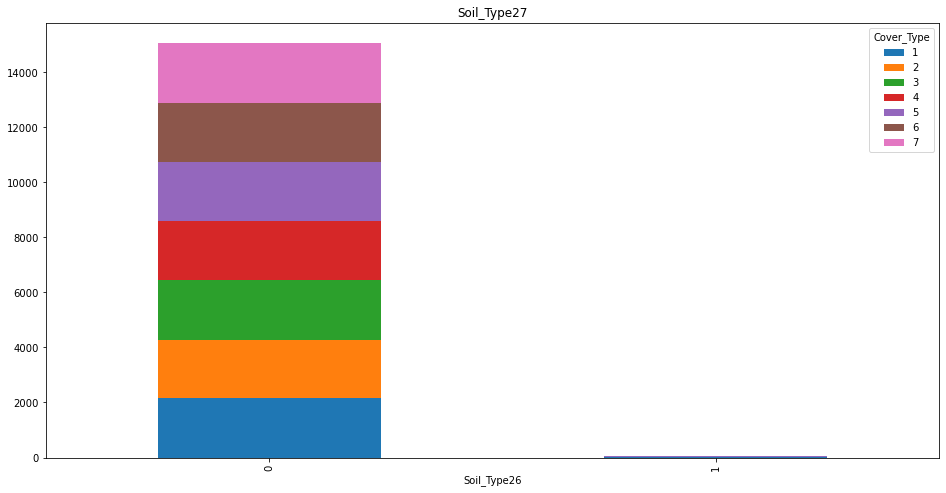

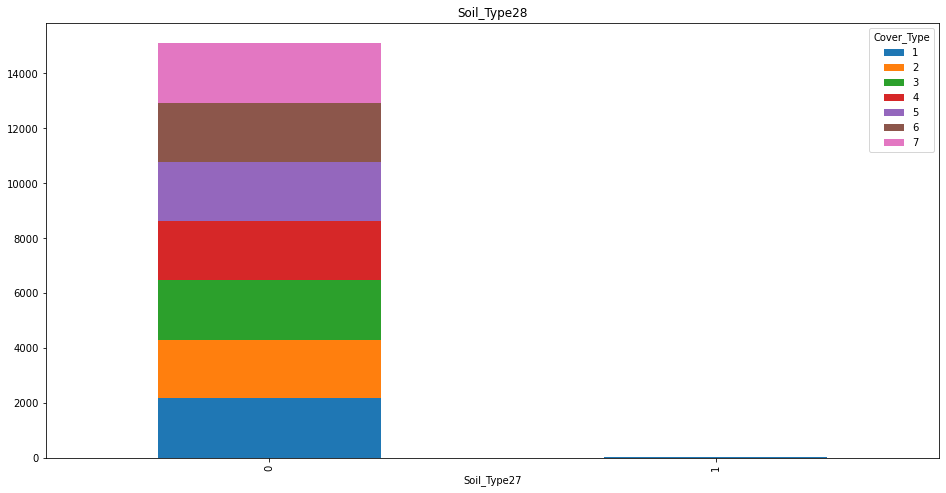

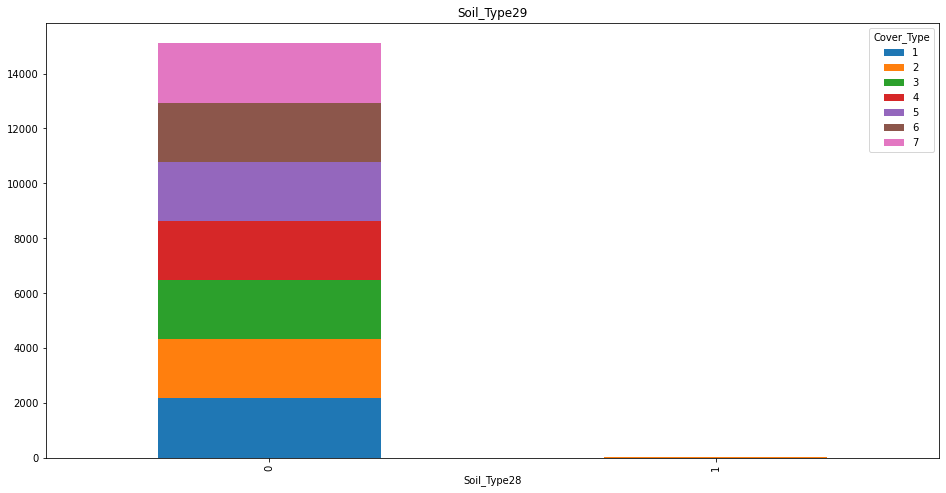

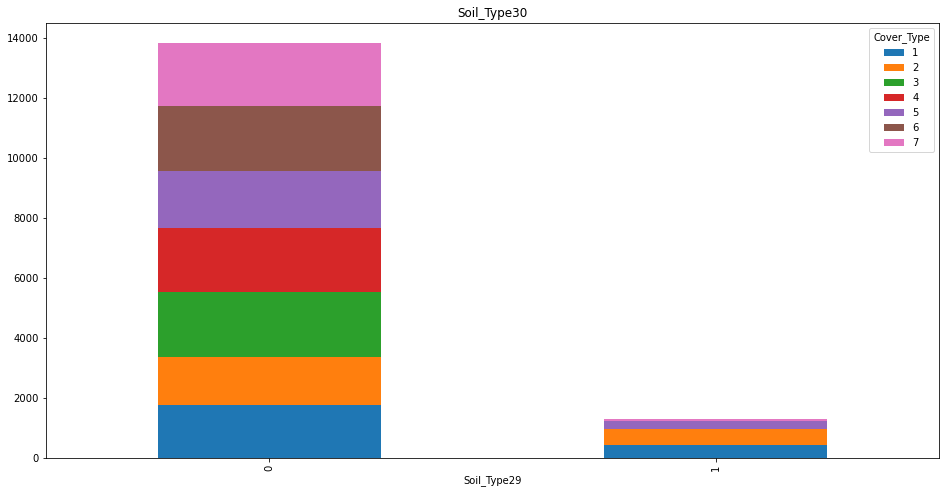

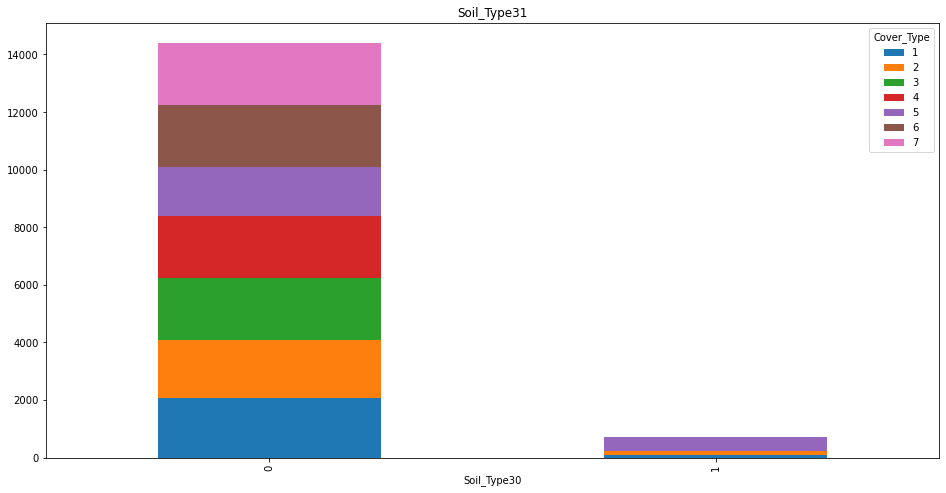

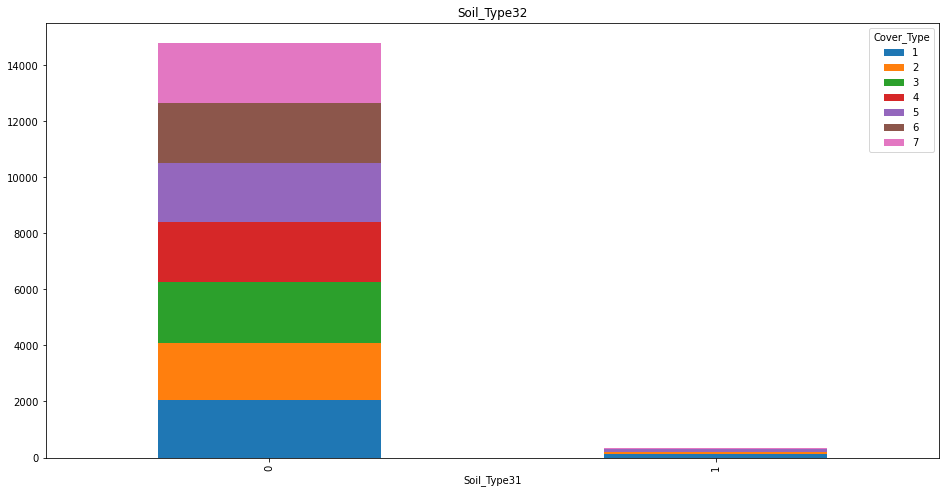

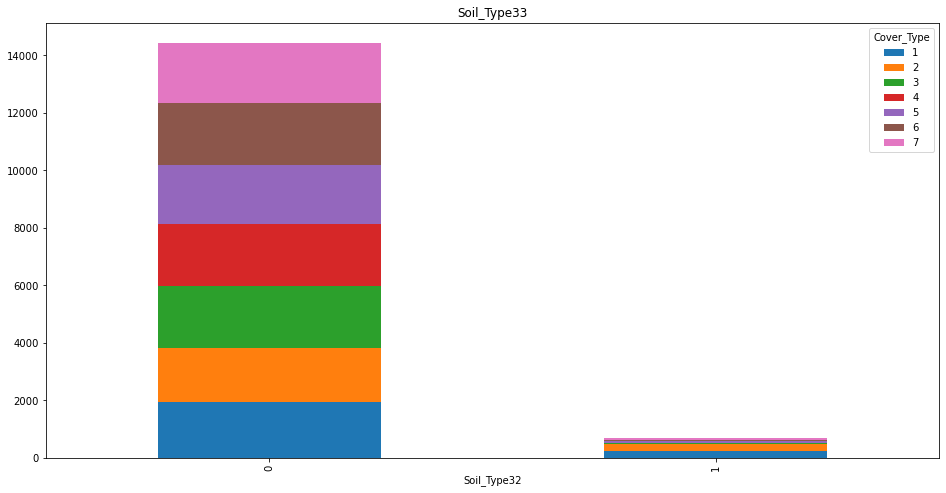

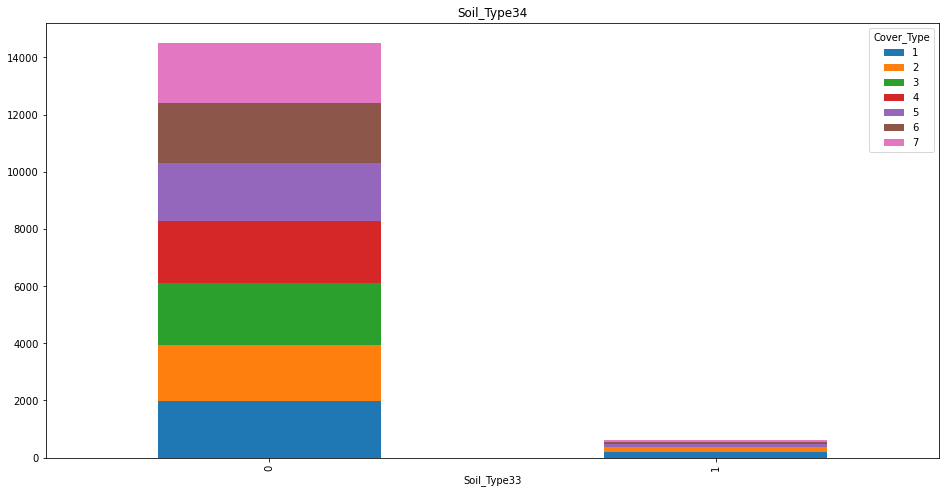

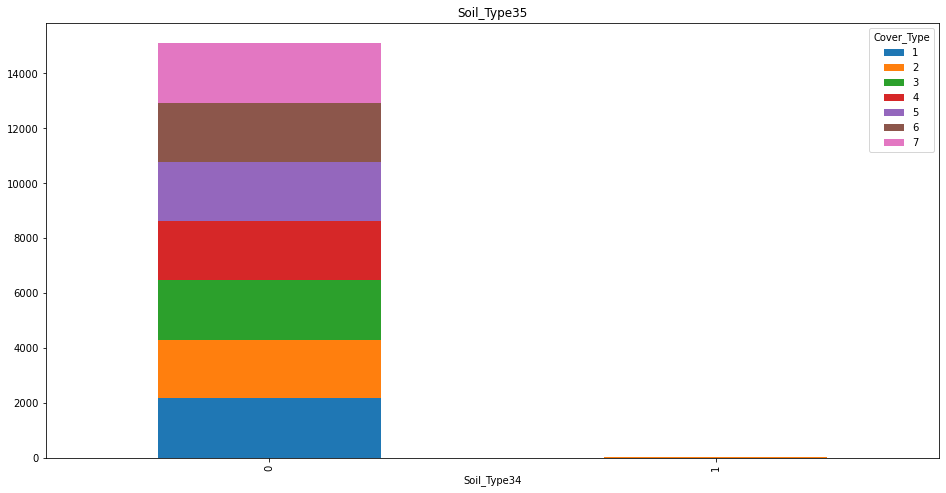

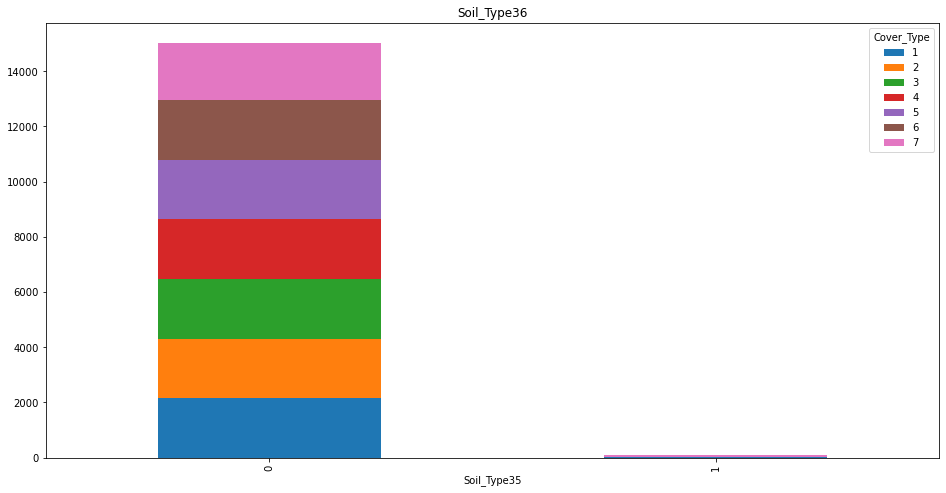

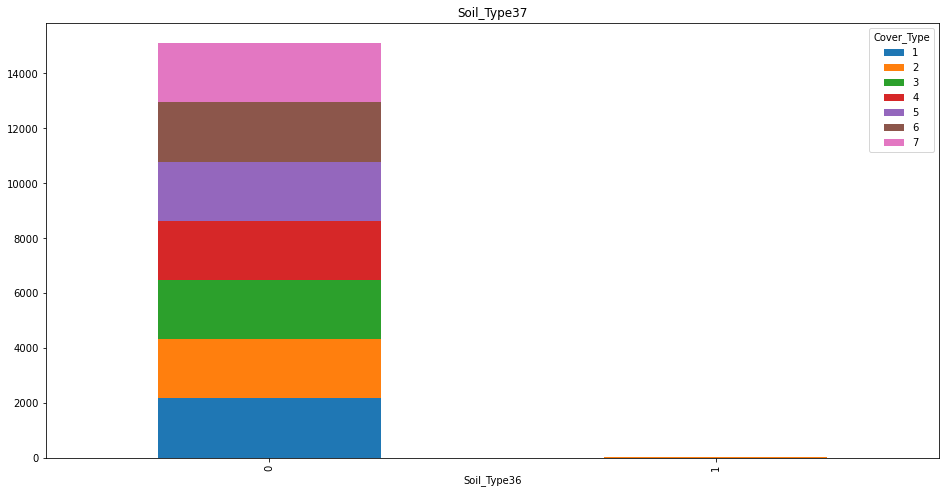

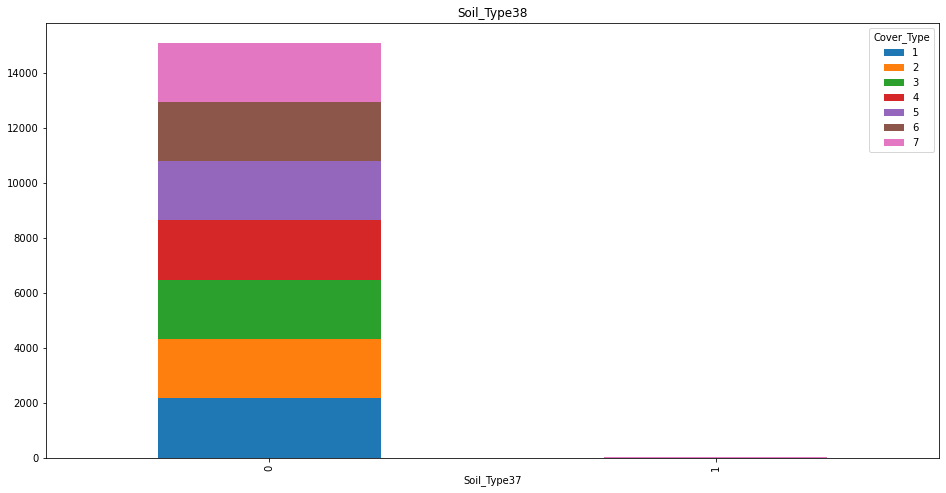

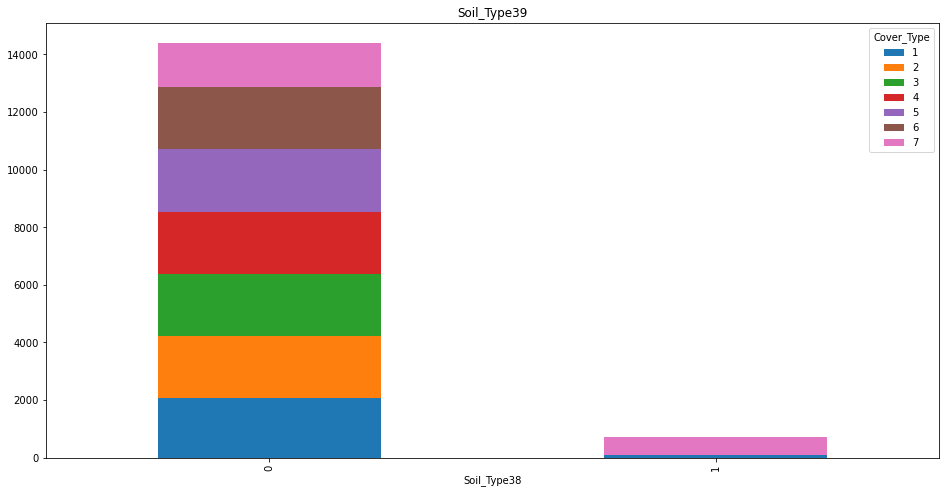

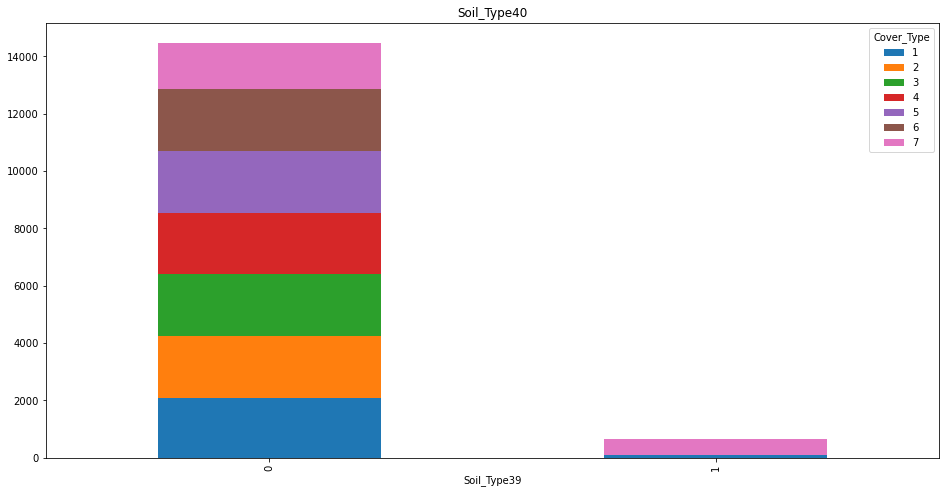

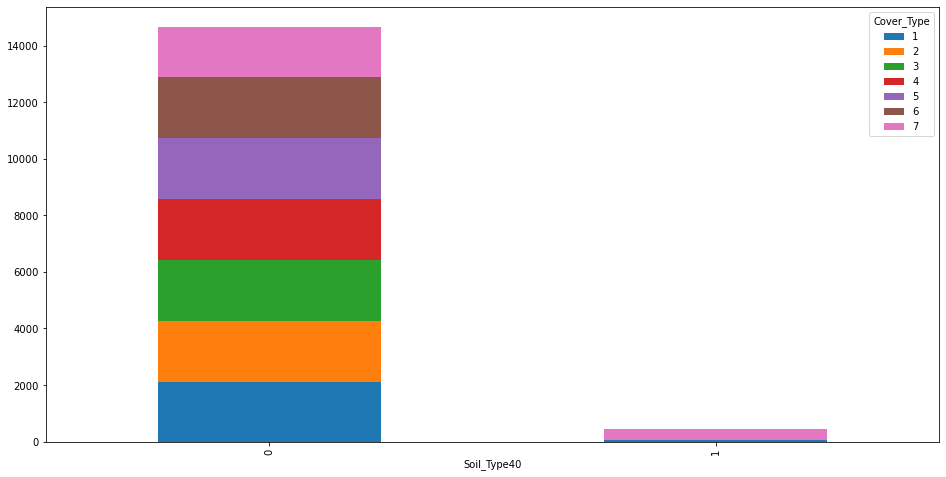

In [24]:
for i in range(1, 41):
    plt.rcParams["figure.figsize"] = (16,8)
    df2 = dataset.groupby([f'Soil_Type{i}', 'Cover_Type'])[f'Soil_Type{i}'].count().unstack('Cover_Type')
    plt.title(f'Soil_Type{i}')
    df2[[1, 2, 3, 4, 5, 6, 7]].plot(kind='bar', stacked=True)

In [25]:
for i in range(1, 41):
    print(test_data[f'Soil_Type{i}'].value_counts())

0    563216
1      2676
Name: Soil_Type1, dtype: int64
0    558990
1      6902
Name: Soil_Type2, dtype: int64
0    562031
1      3861
Name: Soil_Type3, dtype: int64
0    554339
1     11553
Name: Soil_Type4, dtype: int64
0    564460
1      1432
Name: Soil_Type5, dtype: int64
0    559967
1      5925
Name: Soil_Type6, dtype: int64
0    565787
1       105
Name: Soil_Type7, dtype: int64
0    565714
1       178
Name: Soil_Type8, dtype: int64
0    564755
1      1137
Name: Soil_Type9, dtype: int64
0    535400
1     30492
Name: Soil_Type10, dtype: int64
0    553888
1     12004
Name: Soil_Type11, dtype: int64
0    536148
1     29744
Name: Soil_Type12, dtype: int64
0    548937
1     16955
Name: Soil_Type13, dtype: int64
0    565462
1       430
Name: Soil_Type14, dtype: int64
0    565889
1         3
Name: Soil_Type15, dtype: int64
0    563161
1      2731
Name: Soil_Type16, dtype: int64
0    563082
1      2810
Name: Soil_Type17, dtype: int64
0    564053
1      1839
Name: Soil_Type18, dtype: int64
0